# <div style='text-align: center;'><span>Ames Housing Dataset</span></div>
<div style='text-align: center;'><span style='font-weight: bold;'><a href='https://www.kaggle.com/datasets/prevek18/ames-housing-dataset'>Database</a></span></div>

<div style='text-align: center;'>
  <span style='font-size: 17px; font-weight: bold;'>Column Description</span>
</div>

In [1]:
# For display purposes I have collapsed the code
with open('Data/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Metrics and Tools
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Regression Models
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Saving Models
import joblib

# Remove Harmeless warnings
import warnings

**Function for Missing Data**

In [3]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [4]:
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

**Data**

In [5]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [6]:
df.head(3)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## Outliers

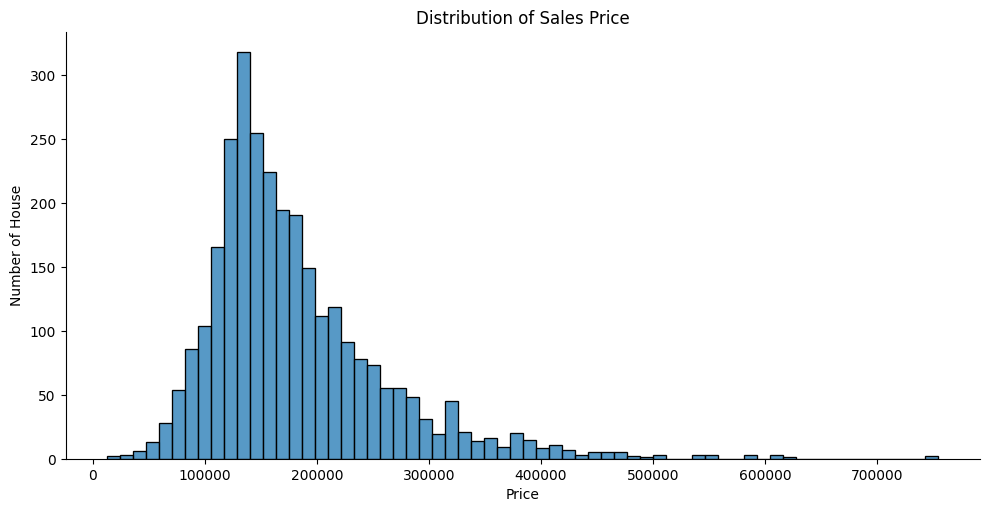

In [8]:
sns.displot(df["SalePrice"], aspect=2)
plt.title('Distribution of Sales Price')
plt.ylabel('Number of House')
plt.xlabel('Price');

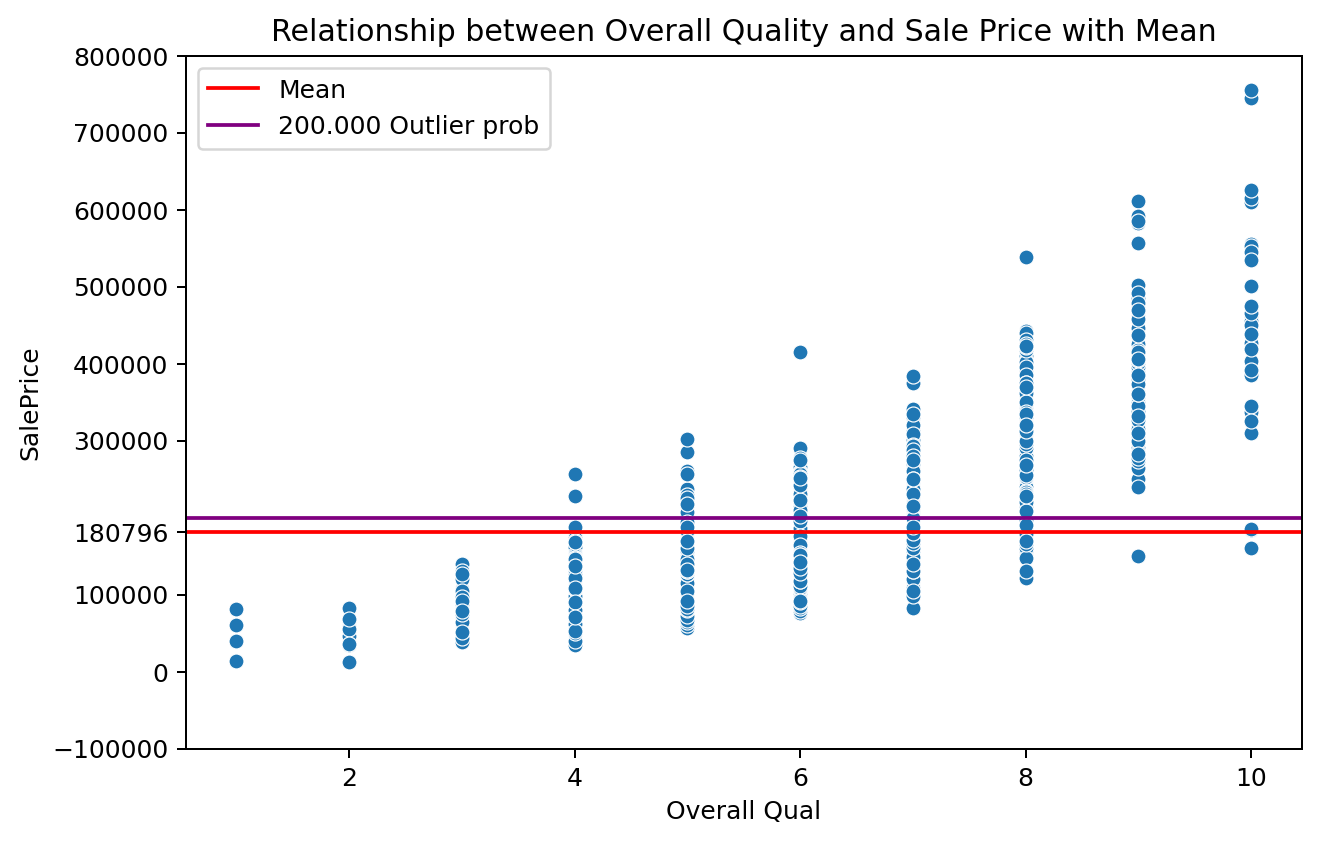

In [9]:
plt.figure(figsize=(8,5), dpi=180)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

plt.axhline(y=df.SalePrice.mean(), color='r', label='Mean')
plt.axhline(y=200000, color='purple', label='200.000 Outlier prob') # ~ 70th quantile 

#plt.axhline(y=df.SalePrice.quantile(.70), color='green', label='70 Quantile')

# current ticks on the y-axis
current_ticks = plt.yticks()[0]

# Add the average tick to the list of current ticks
ticks_with_mean = list(current_ticks) + [df.SalePrice.mean()]
ticks_with_mean = [tick for tick in ticks_with_mean if tick != 200000]

# I sort the ticks in ascending order
ticks_with_mean.sort()

# I set the new ticks on the y axis
plt.yticks(ticks=ticks_with_mean)

plt.title('Relationship between Overall Quality and Sale Price with Mean')
plt.legend()
plt.show()

there are **3 points** that despite having a quality between 9 and 10 seem to have been sold for very little, let's focus on this event.

In [10]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,9,3,1977,1977,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,1050.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,410.0,Unf,0.0,584.0,994.0,GasA,TA,Y,SBrkr,1599,1345,0,2944,0.0,0.0,2,2,3,1,Gd,9,Typ,1,Gd,Attchd,1977.0,RFn,3.0,864.0,TA,TA,Y,140,70,16,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


**Liv Area**

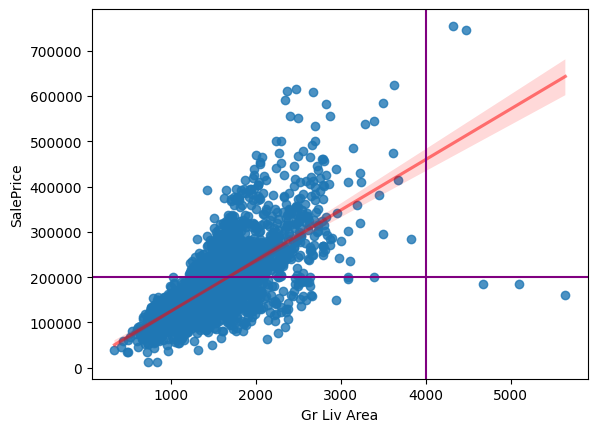

In [11]:
sns.regplot(x='Gr Liv Area',y='SalePrice',data=df, line_kws={'color':'red', 'alpha': .5})
plt.axhline(y=200000, color='purple')
plt.axvline(x=4000, color='purple');

In [12]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260.0,Unf,0.0,878.0,3138.0,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,884.0,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
idx_to_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index

In [14]:
df = df.drop(idx_to_drop,axis=0)

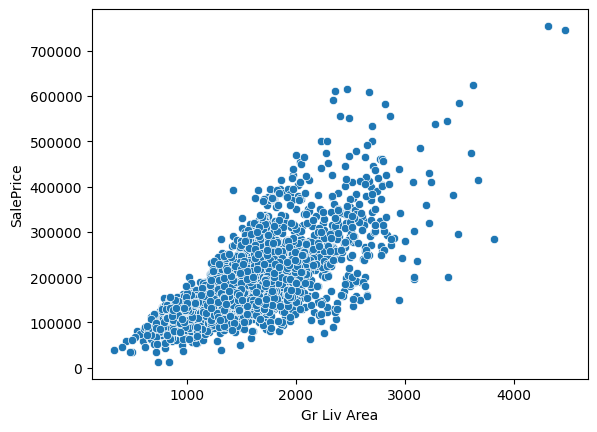

In [15]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df);

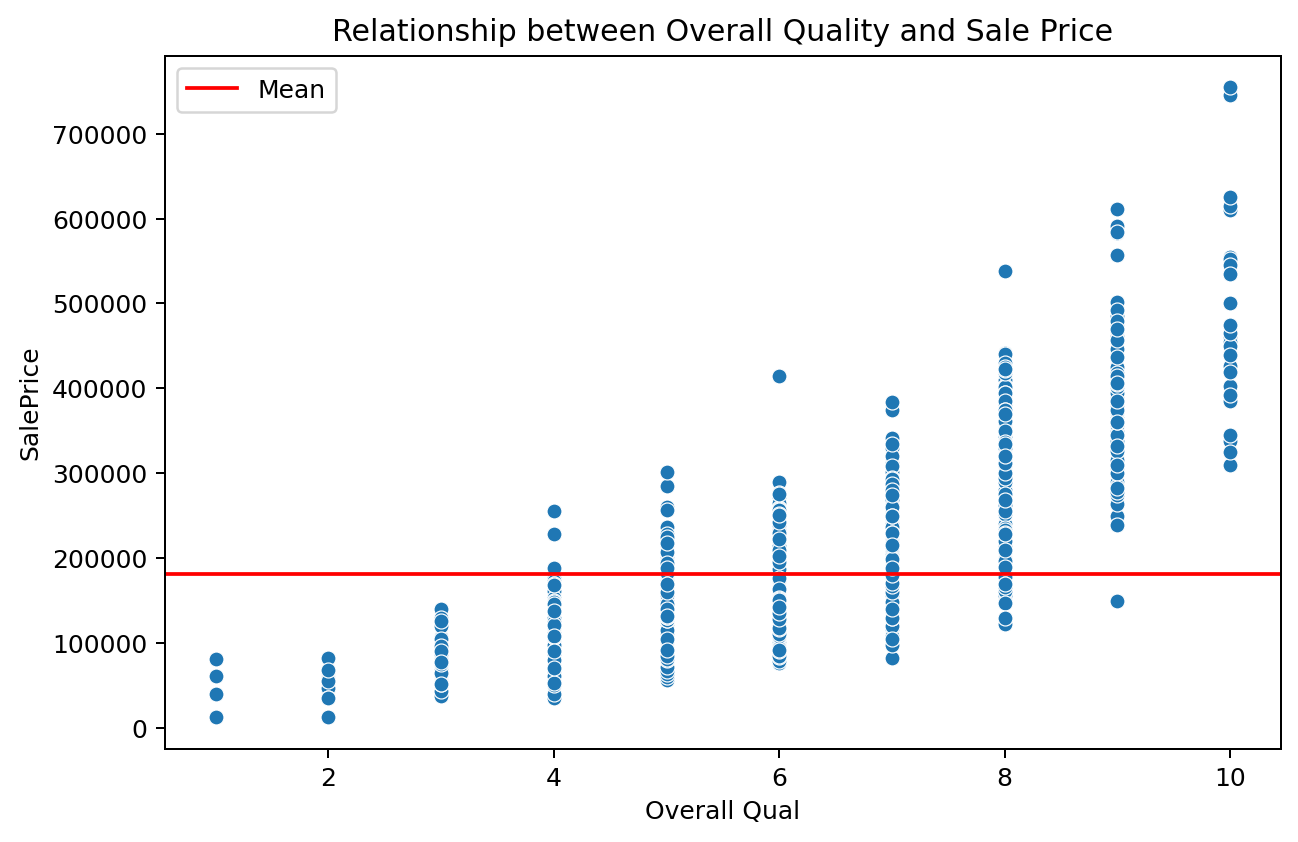

In [16]:
plt.figure(figsize=(8,5), dpi=180)
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

plt.axhline(y=df.SalePrice.mean(), color='r', label='Mean')

plt.title('Relationship between Overall Quality and Sale Price')
plt.legend()
plt.show()

## Missing Data

In [17]:
df = df.drop('PID', axis=1)

In [18]:
percent_nan = percent_missing(df)

I start by considering the percentages of minor missing values, I set a **Treshold < 1%**

In [19]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

**basement**

In [20]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [21]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NaN,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


There are 2 types of basement features, numerical and string descriptives.

The numerical basement columns:

In [22]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [23]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [24]:
percent_nan = percent_missing(df)

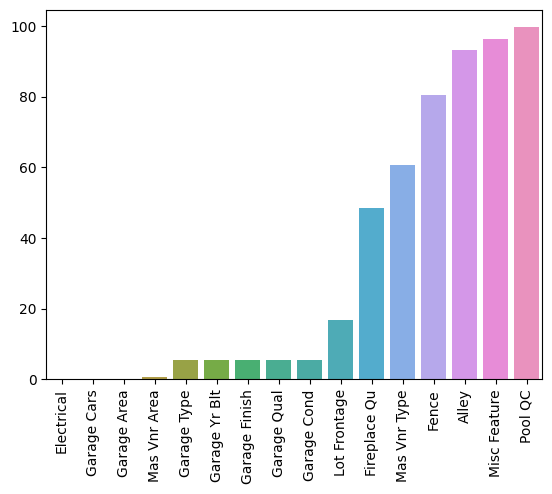

In [25]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

**I drop the columns with a lower percentage of null values**

In [26]:
df = df.dropna(
    axis=0,
    subset=['Electrical','Garage Cars']
)

In [27]:
percent_nan = percent_missing(df)

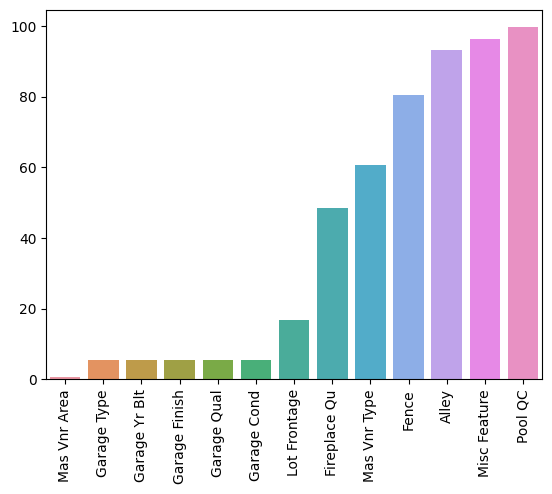

In [28]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Mas Vnr Feature

Based on the Description Text File, **Mas Vnr Type** and **Mas Vnr Area** being missing (NaN) is likely to mean `the house simply just doesn't have a masonry veneer`, in which case, we will **fill** in this data as we did before.

In [29]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [30]:
percent_nan = percent_missing(df)

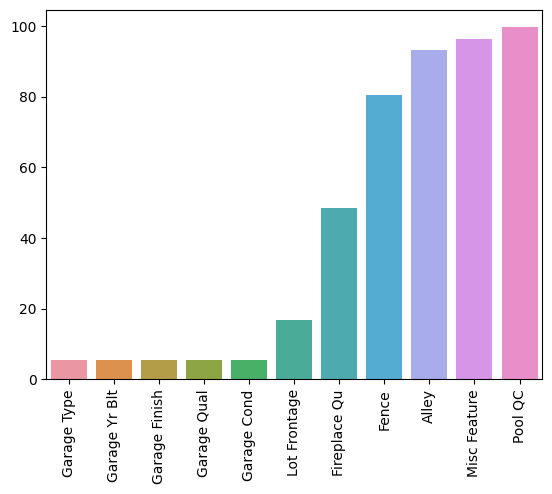

In [31]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Garage Columns

Based on the data description, these `NaN` seem to indicate **no garage**, so we will substitute with "None" or 0.

In [32]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [33]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [34]:
percent_nan = percent_missing(df)

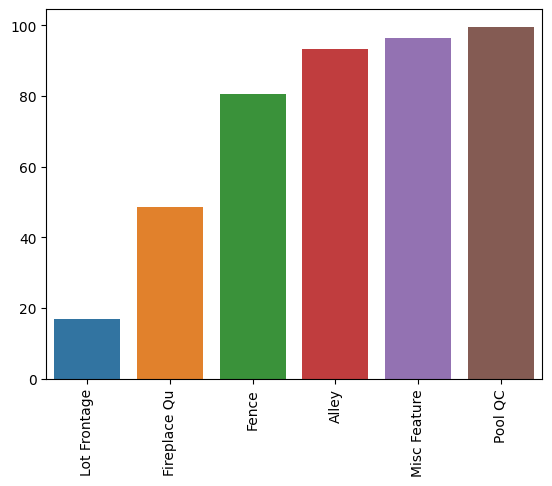

In [35]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

I delete the `columns` that I **can't recover**

In [36]:
df = df.drop(['Alley',
              'Pool QC',
              'Misc Feature', 
              'Fence',
             ], axis=1)

In [37]:
percent_nan = percent_missing(df)

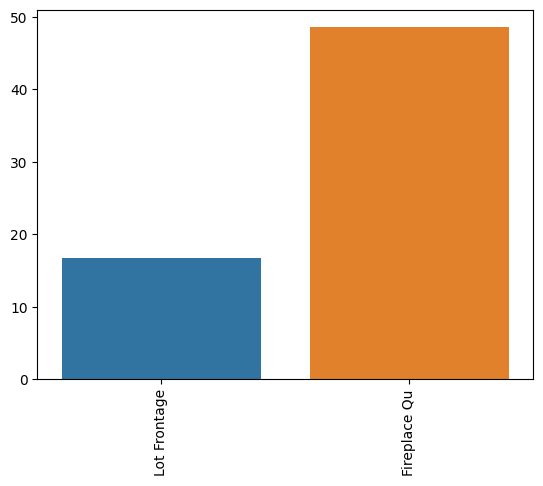

In [38]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

Filling in `Fireplace Quality` based on Description Text

In [39]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [40]:
percent_nan = percent_missing(df)

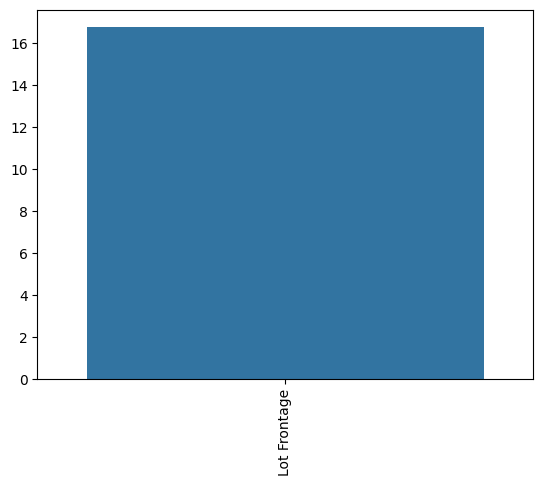

In [41]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Imputation of Missing Data

To **impute** missing data -> we need to decide what other filled in (except NaN values) feature most probably relates and is correlated with the missing feature data. 

In this particular case i will use:

`Neighborhood`: Physical locations within Ames city limits

`LotFrontage`: Linear feet of street connected to property

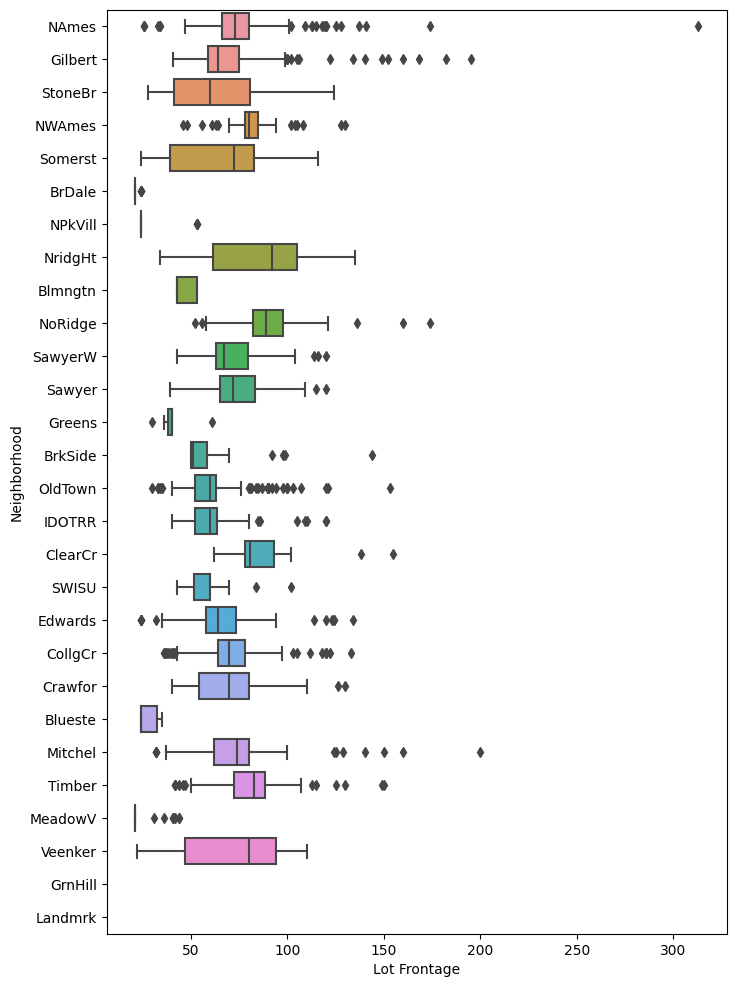

In [42]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h');

In [43]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [44]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,None,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1985,1985,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,368.0,BLQ,1120.0,0.0,1488.0,GasA,TA,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,4,Typ,0,None,Attchd,1985.0,RFn,2.0,528.0,TA,TA,Y,0,54,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,533.0,Unf,0.0,281.0,814.0,GasA,Ex,Y,SBrkr,814,860,0,1674,1.0,0.0,2,1,3,1,Gd,7,Typ,0,None,Attchd,2000.0,RFn,2.0,663.0,TA,TA,Y,0,96,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578.0,Unf,0.0,426.0,1004.0,GasA,Ex,Y,SBrkr,1004,0,0,1004,1.0,0.0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1971,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,734.0,Unf,0.0,344.0,1078.0,GasA,Ex,Y,SBrkr,1078,0,0,1078,1.0,0.0,1,1,3,1,TA,6,Typ,1,Fa,Attchd,1971.0,Fin,2.0,500.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,1Story,8,6,1981,1981,Hip,WdShake,Plywood,Plywood,BrkFace,653.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1686.0,1686.0,GasA,TA,Y,SBrkr,1707,0,0,1707,0.0,0.0,2,1,2,1,TA,6,Typ,1,TA,Attchd,1981.0,RFn,2.0,511.0,TA,TA,Y,574,64,0,0,0,0,0,1,2006,WD,Normal,228000
2897,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,1990,1991,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Wood,Gd,TA,No,LwQ,1216.0,Unf,0.0,0.0,1216.0,GasA,Ex,Y,SBrkr,1298,1216,0,2514,0.0,0.0,2,1,4,1,TA,8,Typ,0,None,Attchd,1990.0,Fin,2.0,693.0,TA,TA,Y,0,0,0,0,0,0,0,4,2006,WD,Normal,250000
2898,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,Wood,Gd,TA,Av,GLQ,1136.0,BLQ,116.0,129.0,1381.0,GasA,Ex,Y,SBrkr,1403,0,0,1403,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,2000.0,Unf,2.0,470.0,TA,TA,Y,0,173,0,0,0,0,0,10,2006,WD,Normal,202000
2912,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,1Story,5,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,149.0,Unf,0.0,1503.0,1652.0,

In [45]:
# look to the blank values filled with the mean
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2925     37.000000
2926     75.144444
2927     62.000000
2928     77.000000
2929     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [46]:
# fill in the blank values with the mean
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [47]:
percent_nan = percent_missing(df)

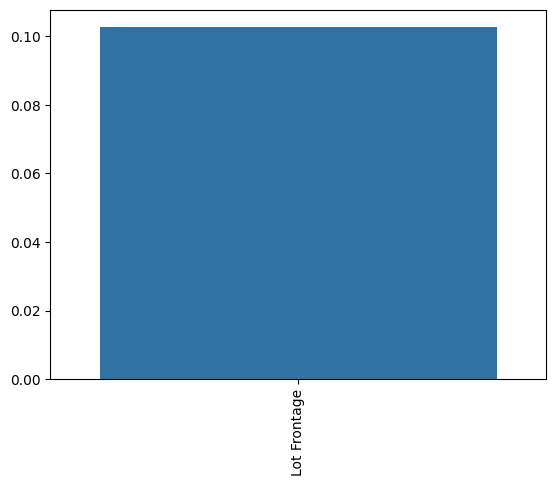

In [48]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [49]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [50]:
percent_missing(df)

Series([], dtype: float64)

## Dummy Variables

In [51]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [52]:
# Numeric Columns
df_nums = df.select_dtypes(exclude='object')
# Obj Columns
df_objs = df.select_dtypes(include='object')

In [53]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath        29

In [54]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qual   

**Conversion**

In [55]:
df_objs = pd.get_dummies(df_objs, drop_first=True)
df_objs = df_objs.astype(int)

In [56]:
df_objs.head()

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,...,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [57]:
final_df = pd.concat([df_nums,df_objs], axis=1)

In [58]:
final_df.head(2)

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Fireplace Qu_Fa,Fireplace Qu_Gd,Fireplace Qu_None,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [59]:
final_df.shape

(2925, 274)

In [60]:
final_df.corr()['SalePrice'].sort_values(ascending=False)[1:]

Overall Qual         0.802637
Gr Liv Area          0.727279
Total Bsmt SF        0.660983
Garage Cars          0.648488
1st Flr SF           0.645635
                       ...   
Garage Finish_Unf   -0.422363
Bsmt Qual_TA        -0.453022
Fireplace Qu_None   -0.481740
Kitchen Qual_TA     -0.527461
Exter Qual_TA       -0.591459
Name: SalePrice, Length: 273, dtype: float64

**Save the DataFrame**

In [61]:
final_df.to_csv("Data/Ames_final_Data.csv",index=False)

## Machine Learning

In [62]:
# Splitting Dataframe into X and y
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

**Train and Test Split**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=23)

**Scaling Data**

In [64]:
scaler = StandardScaler()

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
RND = 23
def regression_basic_models():
    models = []
    models.append(('SVR', SVR()))
    models.append(('SVR_poly', SVR(kernel='poly')))
    models.append(('LinearRegression', LinearRegression()))
    models.append(('XGBRegressor', XGBRegressor()))
    models.append(('ElasticNet', ElasticNet(random_state=RND)))
    models.append(('RandomForestRegressor', RandomForestRegressor(random_state=RND)))

    return models

models = regression_basic_models()

In [68]:
def model_fit_evaluate(models, X_train, y_train, X_test, y_test):
    # fit
    for model in models:
        print(f"Model: {model[0]}\n")
        model[1].fit(X_train, y_train)
        y_pred = model[1].predict(X_test)
        
        # Evaluation
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
        # Print
        print(f"""       
r2_sscore: {r2}
Mean Absolute Error: {mae}\n
Mean Squared Error: {mse}\n
Root Mean Squared Error: {rmse}\n

-----------------------------------------------
        """)

I start with models without parameters, to then choose and start the parameterization phase.

In [69]:
print(f"Mean with wich we are going to compare MAE and RMSE:\n {np.mean(df['SalePrice'])} \n")

model_fit_evaluate(models, scaled_X_train, y_train, scaled_X_test, y_test)

Mean with wich we are going to compare MAE and RMSE:
 180815.53743589742 

Model: SVR

       
r2_sscore: -0.027661976187249415
Mean Absolute Error: 49551.15905005059

Mean Squared Error: 5046184923.705827

Root Mean Squared Error: 71036.5041630416


-----------------------------------------------
        
Model: SVR_poly

       
r2_sscore: -0.02883039985037117
Mean Absolute Error: 49586.94739585594

Mean Squared Error: 5051922298.455471

Root Mean Squared Error: 71076.87597563269


-----------------------------------------------
        
Model: LinearRegression

       
r2_sscore: -3.141192622842225e+20
Mean Absolute Error: 72555458027814.69

Mean Squared Error: 1.54243702921185e+30

Root Mean Squared Error: 1241948883493942.2


-----------------------------------------------
        
Model: XGBRegressor

       
r2_sscore: 0.8807497568897272
Mean Absolute Error: 15624.584297674915

Mean Squared Error: 585561004.3721879

Root Mean Squared Error: 24198.367803886853


-----------------

Given the results of the models, I choose to try with the `RandomForestRegressor` and `ElastcNet`

### RandomForestRegressor

In [70]:
rf = RandomForestRegressor()

In [71]:
param_grid = {
    'n_estimators': [20, 50, 100, 200, 500, 1000],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ["squared_error", "absolute_error"],
    'max_features': ["sqrt", "log2"],

}

In [72]:
grid = RandomizedSearchCV(rf, 
                          param_distributions=param_grid, 
                          scoring='neg_mean_squared_error',
                          cv=5,
                          n_jobs=-1)

In [73]:
grid.fit(scaled_X_test, y_test)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [20, 50, 100, 200, 500,
                                                         1000]},
                   scoring='neg_mean_squared_error')

In [74]:
grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'criterion': 'squared_error'}

In [75]:
y_pred = grid.predict(scaled_X_test)

In [76]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [77]:
print(f"""       
r2_sscore: {r2}
Mean Absolute Error: {mae}\n
Root Mean Squared Error: {rmse}\n
""")

       
r2_sscore: 0.974477326173293
Mean Absolute Error: 7098.226825938567

Root Mean Squared Error: 11194.882048808091




### ElasticNet

In [78]:
en = ElasticNet(max_iter=3000)

In [79]:
param_grid2 = {
    'alpha': [0.1,1,5,10,50,100],
    'l1_ratio': [.1, .5, .7, .9, .95, .99, 1],
    'selection': ['cyclic', 'random']
}

In [80]:
grid2 = RandomizedSearchCV(en, 
                           param_distributions=param_grid2, 
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

In [81]:
grid2.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=5, estimator=ElasticNet(max_iter=3000), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 1, 5, 10, 50, 100],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1],
                                        'selection': ['cyclic', 'random']},
                   scoring='neg_mean_squared_error')

In [84]:
grid2.best_params_

{'selection': 'cyclic', 'l1_ratio': 1, 'alpha': 1}

In [85]:
y_pred = grid2.predict(scaled_X_test)

In [86]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [87]:
print(f"""       
r2_sscore: {r2}
Mean Absolute Error: {mae}\n
Root Mean Squared Error: {rmse}\n
        """)

       
r2_sscore: 0.9010433675671455
Mean Absolute Error: 15291.102514795866

Root Mean Squared Error: 22043.415698375906

        


## Final Model

In [88]:
scaled_X = scaler.fit_transform(X)

In [89]:
final_model = RandomForestRegressor(
    n_estimators = 50,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    criterion = 'absolute_error'
)

In [90]:
final_model.fit(scaled_X, y)

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=50)

In [91]:
# Saving the model to a file
joblib.dump(final_model, 'model_House_price.pkl')

['model_House_price.pkl']

In [ ]:
# To load the model later

# loaded_model = joblib.load('model_House_price.pkl')

- Kevin Milli - 25/08/2023